In [89]:
import pandas as pd
from math import log
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1) Данные

In [168]:
df_nasdaq_d = pd.read_csv('^IXIC_Daily.csv')
df_nasdaq_w = pd.read_csv('^IXIC_Weekly.csv')
df_nasdaq_m = pd.read_csv('^IXIC_Monthly.csv')

df_brent_d = pd.read_csv('BZ=F_Daily.csv', delimiter=';')
df_brent_w = pd.read_csv('BZ=F_Weekly.csv', delimiter=';')
df_brent_m = pd.read_csv('BZ=F_Monthly.csv', delimiter=';')

df_nike_d = pd.read_csv('NKE_Daily.csv')
df_nike_w = pd.read_csv('NKE_Weekly.csv')
df_nike_m = pd.read_csv('NKE_Monthly.csv')

#df_nasdaq_d.drop(columns='Date').astype('float').dtypes
#df_nasdaq_w.drop(columns='Date').astype('float').dtypes
#df_nasdaq_m.drop(columns='Date').astype('float').dtypes

df_brent_d = df_brent_d[df_brent_d.Open != '-']  # brent data is a little (a lot lol) messy because I had to add it manually
df_brent_d.Volume = df_brent_d.Volume.apply(lambda x: x.replace(',', ''))
df_brent_d.iloc[:] = df_brent_d.iloc[::-1].values
df_brent_d = df_brent_d.reindex(index=range(len(df_brent_d.index)))
#df_brent_d.drop(columns='Date').astype('float').dtypes
df_brent_w = df_brent_w[df_brent_w.Open != '-']
df_brent_w.Volume = df_brent_w.Volume.apply(lambda x: x.replace(',', ''))
df_brent_w.iloc[:] = df_brent_w.iloc[::-1].values
df_brent_w = df_brent_w.reindex(index=range(len(df_brent_w.index)))
#df_brent_w.drop(columns='Date').astype('float').dtypes
df_brent_m = df_brent_m[df_brent_m.Open != '-']
df_brent_m.Volume = df_brent_m.Volume.apply(lambda x: x.replace(',', ''))
df_brent_m.iloc[:] = df_brent_m.iloc[::-1].values
df_brent_m = df_brent_m.reindex(index=range(len(df_brent_m.index)))
#df_brent_m.drop(columns='Date').astype('float').dtypes
for col in df_brent_d.drop(columns='Date').columns:
    df_brent_d[col] = df_brent_d[col].astype('float')

#df_nike_d.drop(columns='Date').astype('float').dtypes
#df_nike_w.drop(columns='Date').astype('float').dtypes
#df_nike_m.drop(columns='Date').astype('float').dtypes


## 2) Дневная доходность

### a. pct_change

In [24]:
df_nasdaq_d.drop(columns='Date').pct_change()

,Open,High,Low,Close,Adj Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.017470,0.007388,0.007737,-0.003612,-0.003612,-0.047602
2,-0.002507,-0.004169,-0.016651,-0.016508,-0.016508,0.098021
3,-0.017090,-0.012330,0.001454,0.003276,0.003276,0.009383
4,-0.000125,-0.001642,0.000423,-0.002761,-0.002761,-0.012174
...,...,...,...,...,...,...
541,0.004321,0.007188,0.002644,0.011265,0.011265,-0.014287
542,0.002437,0.001757,0.005466,-0.006982,-0.006982,0.012995
543,-0.002056,0.000536,-0.001313,0.012642,0.012642,0.113558
544,0.047874,0.038312,0.015997,0.010146,0.010146,0.268510


In [21]:
df_brent_d.drop(columns='Date').pct_change()

,Open,High,Low,Close*,Adj Close**,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.008523,-0.009174,0.017084,-0.005329,-0.005329,-0.398192
2,-0.006970,0.000463,0.002366,-0.007221,-0.007221,0.087172
3,-0.007253,0.002082,-0.004248,0.012670,0.012670,0.206054
4,0.009192,-0.006234,-0.017303,-0.033133,-0.033133,0.000126
...,...,...,...,...,...,...
541,0.015183,-0.002093,0.016060,0.028905,0.028905,-0.805369
542,0.036133,0.041832,0.032810,0.016973,0.016973,8.752425
543,0.006120,-0.017000,-0.012290,-0.015078,-0.015078,0.018985
544,-0.018478,0.006144,-0.031107,-0.033774,-0.033774,0.062686


In [26]:
df_nike_d.drop(columns='Date').pct_change()

,Open,High,Low,Close,Adj Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.023956,0.008443,0.011419,-0.007752,-0.007752,0.419071
2,-0.003166,-0.003149,-0.003920,-0.004453,-0.004453,-0.141426
3,-0.008521,0.000925,0.005273,0.008318,0.008318,-0.263835
4,0.003906,0.011393,0.005716,0.007316,0.007316,0.294036
...,...,...,...,...,...,...
541,0.011927,0.021719,0.013077,0.027970,0.027970,0.076728
542,0.014917,-0.000987,0.007376,-0.017421,-0.017421,-0.083904
543,-0.001089,0.007093,0.004119,0.024219,0.024219,0.132694
544,0.050045,0.038156,0.014037,0.006960,0.006960,0.346919


### b. P(t)/P(t-1) – 1

In [157]:
df_nasdaq_d_temp = pd.DataFrame()
for col in df_nasdaq_d.drop(columns='Date').columns:
    df_nasdaq_d_temp[col] = pd.Series([df_nasdaq_d[col].values[x]/df_nasdaq_d[col].values[x-1] - 1 for x in df_nasdaq_d.index[1:]])
df_nasdaq_d_temp

,Open,High,Low,Close,Adj Close,Volume
0,0.017470,0.007388,0.007737,-0.003612,-0.003612,-0.047602
1,-0.002507,-0.004169,-0.016651,-0.016508,-0.016508,0.098021
2,-0.017090,-0.012330,0.001454,0.003276,0.003276,0.009383
3,-0.000125,-0.001642,0.000423,-0.002761,-0.002761,-0.012174
4,-0.000297,-0.005599,-0.009305,0.001856,0.001856,-0.009595
...,...,...,...,...,...,...
540,0.004321,0.007188,0.002644,0.011265,0.011265,-0.014287
541,0.002437,0.001757,0.005466,-0.006982,-0.006982,0.012995
542,-0.002056,0.000536,-0.001313,0.012642,0.012642,0.113558
543,0.047874,0.038312,0.015997,0.010146,0.010146,0.268510


In [132]:
df_brent_d_temp = pd.DataFrame()
for col in df_brent_d.drop(columns='Date').columns:
    df_brent_d_temp[col] = pd.Series([df_brent_d[col].values[x]/df_brent_d[col].values[x-1] - 1 for x in df_brent_d.index[1:]]).dropna()
df_brent_d_temp

,Open,High,Low,Close*,Adj Close**,Volume
0,-0.008523,-0.009174,0.017084,-0.005329,-0.005329,-0.398192
1,-0.006970,0.000463,0.002366,-0.007221,-0.007221,0.087172
2,-0.007253,0.002082,-0.004248,0.012670,0.012670,0.206054
3,0.009192,-0.006234,-0.017303,-0.033133,-0.033133,0.000126
4,-0.025689,-0.005809,0.000241,0.017493,0.017493,-0.903444
...,...,...,...,...,...,...
540,0.015183,-0.002093,0.016060,0.028905,0.028905,-0.805369
541,0.036133,0.041832,0.032810,0.016973,0.016973,8.752425
542,0.006120,-0.017000,-0.012290,-0.015078,-0.015078,0.018985
543,-0.018478,0.006144,-0.031107,-0.033774,-0.033774,0.062686


In [162]:
df_nike_d_temp = pd.DataFrame()
for col in df_nike_d.drop(columns='Date').columns:
    df_nike_d_temp[col] = pd.Series([df_nike_d[col].values[x]/df_nike_d[col].values[x-1] - 1 for x in df_nike_d.index[1:]]).dropna()
df_nike_d_temp

,Open,High,Low,Close,Adj Close,Volume
0,0.023956,0.008443,0.011419,-0.007752,-0.007752,0.419071
1,-0.003166,-0.003149,-0.003920,-0.004453,-0.004453,-0.141426
2,-0.008521,0.000925,0.005273,0.008318,0.008318,-0.263835
3,0.003906,0.011393,0.005716,0.007316,0.007316,0.294036
4,0.008560,-0.008525,0.003192,0.004559,0.004559,-0.416248
...,...,...,...,...,...,...
540,0.011927,0.021719,0.013077,0.027970,0.027970,0.076728
541,0.014917,-0.000987,0.007376,-0.017421,-0.017421,-0.083904
542,-0.001089,0.007093,0.004119,0.024219,0.024219,0.132694
543,0.050045,0.038156,0.014037,0.006960,0.006960,0.346919


### c. Ln(P(t)/P(t-1))

In [134]:
df_nasdaq_d_temp_ln = pd.DataFrame()
for col in df_nasdaq_d.drop(columns='Date').columns:
    df_nasdaq_d_temp_ln[col] = pd.Series([log(df_nasdaq_d[col].values[x]/df_nasdaq_d[col].values[x-1]) for x in df_nasdaq_d.index[1:]]).dropna()
df_nasdaq_d_temp_ln

,Open,High,Low,Close,Adj Close,Volume
0,0.017319,0.007361,0.007707,-0.003619,-0.003619,-0.048772
1,-0.002510,-0.004178,-0.016791,-0.016646,-0.016646,0.093509
2,-0.017238,-0.012406,0.001453,0.003271,0.003271,0.009340
3,-0.000125,-0.001643,0.000423,-0.002765,-0.002765,-0.012248
4,-0.000297,-0.005614,-0.009349,0.001855,0.001855,-0.009642
...,...,...,...,...,...,...
540,0.004312,0.007162,0.002641,0.011202,0.011202,-0.014390
541,0.002435,0.001756,0.005451,-0.007007,-0.007007,0.012911
542,-0.002058,0.000536,-0.001314,0.012563,0.012563,0.107560
543,0.046764,0.037596,0.015870,0.010095,0.010095,0.237843


In [135]:
df_brent_d_temp_ln = pd.DataFrame()
for col in df_brent_d.drop(columns='Date').columns:
    df_brent_d_temp_ln[col] = pd.Series([log(df_brent_d[col].values[x]/df_brent_d[col].values[x-1])for x in df_brent_d.index[1:]]).dropna()
df_brent_d_temp_ln

,Open,High,Low,Close*,Adj Close**,Volume
0,-0.008560,-0.009217,0.016939,-0.005343,-0.005343,-0.507816
1,-0.006995,0.000463,0.002363,-0.007247,-0.007247,0.083580
2,-0.007280,0.002080,-0.004257,0.012591,0.012591,0.187354
3,0.009150,-0.006254,-0.017454,-0.033694,-0.033694,0.000126
4,-0.026025,-0.005825,0.000241,0.017342,0.017342,-2.337629
...,...,...,...,...,...,...
540,0.015069,-0.002095,0.015933,0.028495,0.028495,-1.636648
541,0.035496,0.040980,0.032284,0.016831,0.016831,2.277516
542,0.006101,-0.017147,-0.012366,-0.015193,-0.015193,0.018807
543,-0.018651,0.006125,-0.031601,-0.034357,-0.034357,0.060799


In [136]:
df_nike_d_temp_ln = pd.DataFrame()
for col in df_nike_d.drop(columns='Date').columns:
    df_nike_d_temp_ln[col] = pd.Series([log(df_nike_d[col].values[x]/df_nike_d[col].values[x-1]) for x in df_nike_d.index[1:]]).dropna()
df_nike_d_temp_ln

,Open,High,Low,Close,Adj Close,Volume
0,0.023674,0.008408,0.011354,-0.007782,-0.007782,0.350002
1,-0.003171,-0.003154,-0.003928,-0.004463,-0.004463,-0.152483
2,-0.008557,0.000924,0.005260,0.008284,0.008284,-0.306301
3,0.003899,0.011329,0.005699,0.007289,0.007289,0.257766
4,0.008524,-0.008562,0.003187,0.004548,0.004548,-0.538279
...,...,...,...,...,...,...
540,0.011856,0.021487,0.012992,0.027586,0.027586,0.073927
541,0.014807,-0.000987,0.007349,-0.017575,-0.017575,-0.087634
542,-0.001089,0.007068,0.004110,0.023930,0.023930,0.124599
543,0.048833,0.037446,0.013939,0.006936,0.006936,0.297820


## 3) графики по NASDAQ

### a. Гистограммы с дневной доходностью

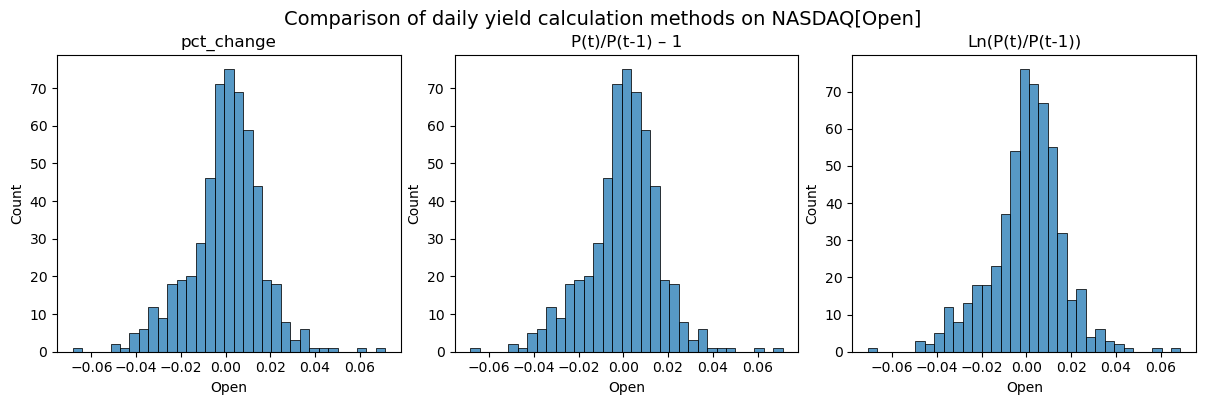

In [151]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), dpi=100)
sns.histplot(x=df_nasdaq_d_temp.Open.astype('float'), ax=ax2)
sns.histplot(data=df_nasdaq_d.drop(columns='Date').pct_change(), x="Open", ax=ax1)
sns.histplot(x=df_nasdaq_d_temp_ln.Open.astype('float'), ax=ax3)
fig.suptitle('Comparison of daily yield calculation methods on NASDAQ[Open]', fontsize=14)
ax1.set_title('pct_change')
ax2.set_title('P(t)/P(t-1) – 1')
ax3.set_title('Ln(P(t)/P(t-1))')
fig.tight_layout(pad=0.5)

### b. Q-Q plot

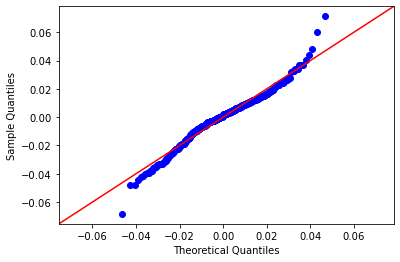

In [152]:
import statsmodels.api as sm
mean_temp = df_nasdaq_d_temp.Open.astype('float').mean()
scale_temp = np.nanstd(df_nasdaq_d_temp.Open.astype('float').values)
fig = sm.qqplot(df_nasdaq_d_temp.Open.astype('float'), line='45', loc=mean_temp, scale=scale_temp)
plt.show()

## 4) scatterplots

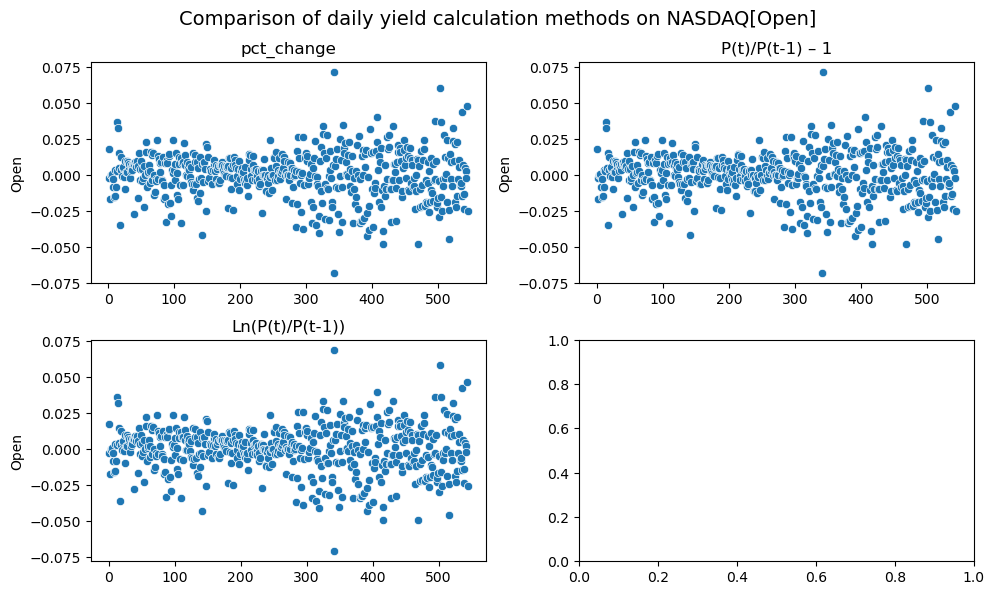

In [139]:
fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 6), dpi=100)
sns.scatterplot(data=df_nasdaq_d.drop(columns='Date').pct_change(), x=df_nasdaq_d.index, y="Open", ax=ax1)
sns.scatterplot(x=df_nasdaq_d_temp.index, y=df_nasdaq_d_temp.Open.astype('float'), ax=ax2)
sns.scatterplot(x=df_nasdaq_d_temp_ln.index, y=df_nasdaq_d_temp_ln.Open.astype('float'), ax=ax3)
fig.suptitle('Comparison of daily yield calculation methods on NASDAQ[Open]', fontsize=14)
ax1.set_title('pct_change')
ax2.set_title('P(t)/P(t-1) – 1')
ax3.set_title('Ln(P(t)/P(t-1))')
fig.tight_layout(pad=0.9)

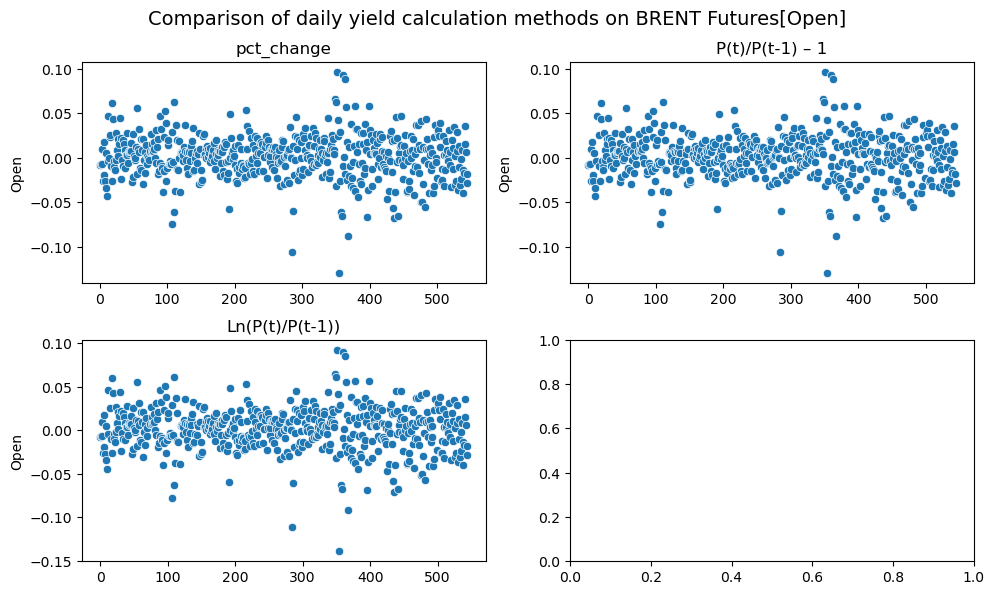

In [140]:
fig, ((ax1,ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 6), dpi=100)
sns.scatterplot(data=df_brent_d.drop(columns='Date').pct_change(), x=df_brent_d.index, y="Open", ax=ax1)
sns.scatterplot(x=df_brent_d_temp.index, y=df_brent_d_temp.Open.astype('float'), ax=ax2)
sns.scatterplot(x=df_brent_d_temp_ln.index, y=df_brent_d_temp_ln.Open.astype('float'), ax=ax3)
fig.suptitle('Comparison of daily yield calculation methods on BRENT Futures[Open]', fontsize=14)
ax1.set_title('pct_change')
ax2.set_title('P(t)/P(t-1) – 1')
ax3.set_title('Ln(P(t)/P(t-1))')
fig.tight_layout(pad=0.9)

## 5) Интерпретация

**Гистограммы:** <br>
Как мы можем видеть из гистограмм, среднее значение дневной доходности слегка меньше нуля - это означает, что общий тренд за время наблюдения был отрицательным, хотя и незначительно<br>
"хвосты" распределения немного толще, чем стоило бы ожидать от нормального распределения (kurtosis > 0). Это означает, что в данных присутствуют свидетельства неожиданных скачков/падений NASDAQ чаще, чем ожидалось бы при нормальном распределении дневных доходностей<br>

**Q-Q plot:** <br>
данный график позволяет увидеть, что в целом распределение дневных доходностей близко к нормальному при надлежащем среднем значении и стандартном отклонении<br>
Однако, стоит заметить что данный график подпадает под категорию "heavy-tailed" - "хвосты" графика имеют больший уклон чем остальной график и график нормального распределения, что еще раз указывает на то, что значений в "экстремумах" распределения больше, чем в аналогичном нормальном распределении<br>

**Вывод:** Дневная доходность NASDAQ распределена нормально, но присутствуют неожиданные скачки, а так едва ли значительный ,но все же тренд на снижение стоимости за период наблюдения

## 6) Нормальность данных

### a. Chi-square test

In [178]:
from scipy.stats import chisquare #If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.
statistic1, pvalue1 = chisquare(df_nasdaq_d.dropna().Open) 
statistic2, pvalue2 = chisquare(df_nasdaq_w.dropna().Open)
statistic3, pvalue3 = chisquare(df_nasdaq_m.dropna().Open)
pvalue1, pvalue2, pvalue3

(0.0, 0.0, 0.0)

In [181]:
statistic1, pvalue1 = chisquare(df_brent_d.dropna().Open) 
statistic2, pvalue2 = chisquare(df_brent_w.dropna().Open)
statistic3, pvalue3 = chisquare(df_brent_m.dropna().Open)
pvalue1, pvalue2, pvalue3

(1.7076381842482112e-296, 4.564033787467767e-70, 1.7380538246845054e-11)

In [182]:
statistic1, pvalue1 = chisquare(df_nike_d.dropna().Open) 
statistic2, pvalue2 = chisquare(df_nike_w.dropna().Open)
statistic3, pvalue3 = chisquare(df_nike_m.dropna().Open)
pvalue1, pvalue2, pvalue3

(6.551419968063934e-177, 1.9901868959021762e-38, 1.2649905189519928e-11)

### b. Kolmogorov-Smirnov test

In [179]:
from scipy.stats import kstest
statistic1, pvalue1 = kstest(df_nasdaq_d.dropna().Open, 'norm')
statistic2, pvalue2 = kstest(df_nasdaq_w.dropna().Open, 'norm')
statistic3, pvalue3 = kstest(df_nasdaq_m.dropna().Open, 'norm')
pvalue1, pvalue2, pvalue3

(0.0, 0.0, 0.0)

In [183]:
statistic1, pvalue1 = kstest(df_brent_d.dropna().Open, 'norm')
statistic2, pvalue2 = kstest(df_brent_w.dropna().Open, 'norm')
statistic3, pvalue3 = kstest(df_brent_m.dropna().Open, 'norm')
pvalue1, pvalue2, pvalue3

(0.0, 0.0, 0.0)

In [184]:
statistic1, pvalue1 = kstest(df_nike_d.dropna().Open, 'norm')
statistic2, pvalue2 = kstest(df_nike_w.dropna().Open, 'norm')
statistic3, pvalue3 = kstest(df_nike_m.dropna().Open, 'norm')
pvalue1, pvalue2, pvalue3

(0.0, 0.0, 0.0)

### c. Jarque-Bera test

In [180]:
from scipy.stats import jarque_bera
statistic1, pvalue1 = jarque_bera(df_nasdaq_d.dropna().Open)
statistic2, pvalue2 = jarque_bera(df_nasdaq_w.dropna().Open)
statistic3, pvalue3 = jarque_bera(df_nasdaq_m.dropna().Open)
pvalue1, pvalue2, pvalue3

(1.4244731427748292e-06, 0.07749121583006902, 0.5024986440421676)

In [186]:
statistic1, pvalue1 = jarque_bera(df_brent_d.dropna().Open)
statistic2, pvalue2 = jarque_bera(df_brent_w.dropna().Open)
statistic3, pvalue3 = jarque_bera(df_brent_m.dropna().Open)
pvalue1, pvalue2, pvalue3

(0.006336993162480042, 0.31486237948664, 0.6931860608963081)

In [185]:
statistic1, pvalue1 = jarque_bera(df_nike_d.dropna().Open)
statistic2, pvalue2 = jarque_bera(df_nike_w.dropna().Open)
statistic3, pvalue3 = jarque_bera(df_nike_m.dropna().Open)
pvalue1, pvalue2, pvalue3

(0.0008596405971005305, 0.31295765626671557, 0.7532134346360047)

## 7) Интерпретация

H0 - распределение нормальное<br>
H1 - распределение не нормальное<br>

Как мы видим, p-value на всех данных тестов Хи-квадрат и Колмогорова-Смирнова меньше 0.05, а значит мы отвергаем H0, предполагая H1<br>
Интересная ситуация происходит на Jarque-bera тесте - для дневных данных мы видим схожую с другими тестами ситуацию, однако, для недельных и месячных, p-value сильно превышает 0.05. это можно связать с тем, что этот тест эффективен только на больших объёмах данных

## 8) Ковариация

In [190]:
array1 = np.array(df_nasdaq_d.drop(columns='Date').pct_change().dropna().Open.values)
array2 = np.array(df_brent_d.drop(columns='Date').pct_change().dropna().Open.values)
np.cov(array1, array2)[0][1]

1.9785430200868524e-05

## 11) Построить доверительный интервал для средней дневной доходности FTSE 100 (T-distribution)

In [219]:
import scipy.stats as st
data = df_nasdaq_d.drop(columns='Date').pct_change().dropna().Open.values
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(-0.0012713851156957278, 0.0014287888060979844)

## 12) Построить доверительный интервал для разности средних доходностей FTSE 100 и Brent

In [221]:
data1 = df_nasdaq_d.drop(columns='Date').pct_change().dropna().Open.values
data2 = df_brent_d.drop(columns='Date').pct_change().dropna().Open.values
data = [data1[x]-data2[x] for x in range(min(len(data1), len(data2)))]
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(-0.0038575997359015413, 0.0010094857391710157)

## 13) Построить доверительный интервал для стандартного отклонения доходности FTSE 100 (Chi-Square Dist)